In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



---



In [5]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [6]:
y_pred = rf_classifier.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.97      0.94      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



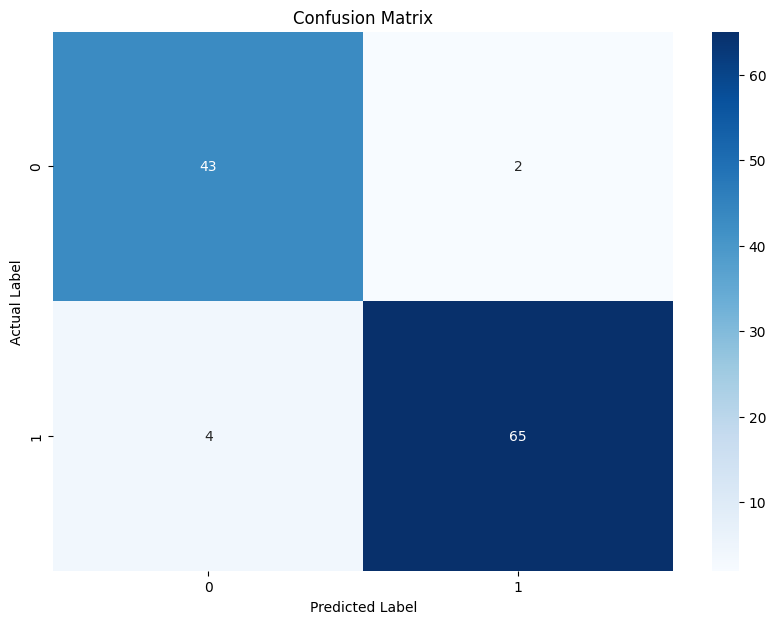

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

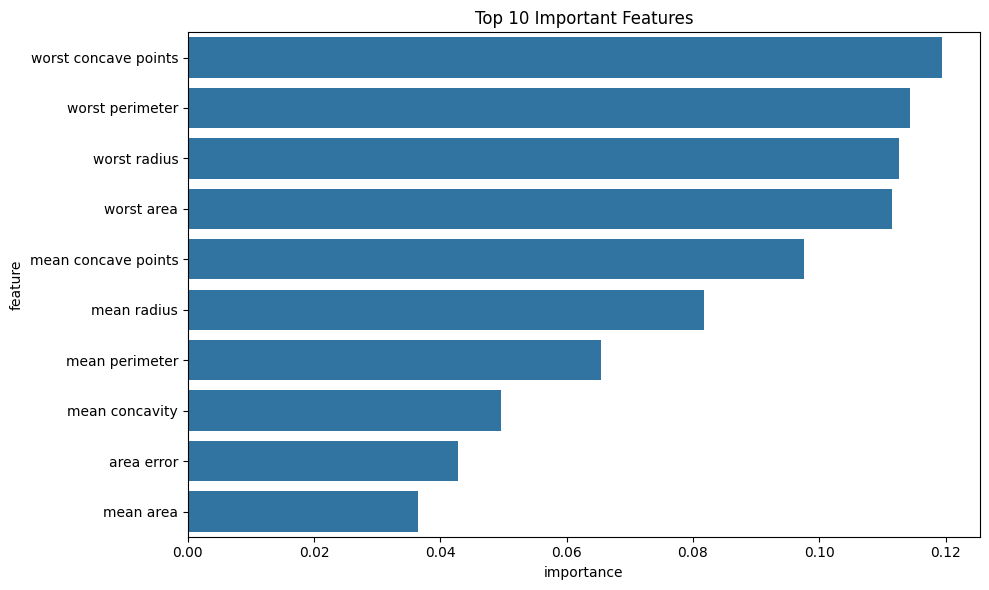

In [10]:
feature_importance = pd.DataFrame({'feature': data.feature_names, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Random Forest Accuracy: 0.9473684210526315
Decision Tree Accuracy: 0.9122807017543859


In [12]:
comparison = pd.DataFrame({'Actual': y_test, 'Random Forest': y_pred, 'Decision Tree': dt_pred})
print("\nSample Predictions:")
print(comparison.sample(10))


Sample Predictions:
     Actual  Random Forest  Decision Tree
291       1              1              1
370       0              0              0
516       0              0              0
511       1              1              1
55        1              1              1
120       1              1              1
18        0              0              0
129       0              0              0
332       1              1              1
478       1              1              1


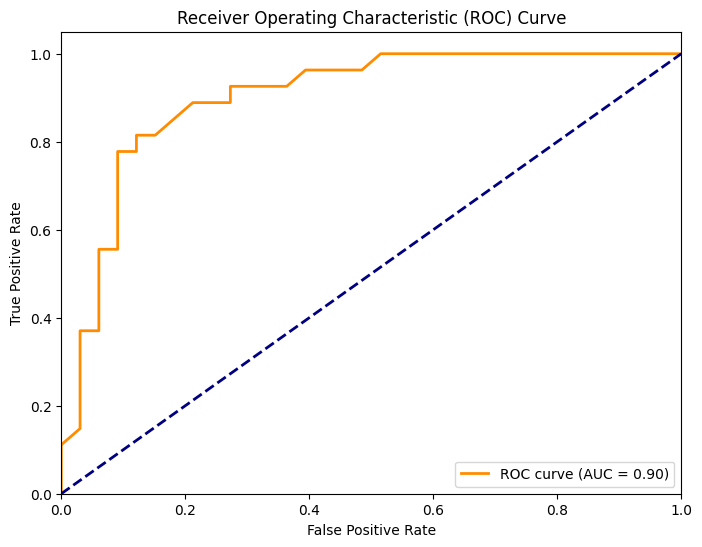

In [27]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=2),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [29]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8224290780141844


In [30]:
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.8333333333333334

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.81      0.81      0.81        27

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [31]:
final_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=2)
final_rf_classifier.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=2)

In [33]:
joblib.dump(best_rf_classifier, 'best_rf_model.joblib')

['best_rf_model.joblib']